### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [1]:
#exploratory data analysis project from the scratch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [2]:
#data preparation

df = pd.read_csv('/kaggle/input/superstore-sales-dataset/SuperStoreOrders.csv')
df.head()

order_id order_date ship_date       ship_mode    customer_name  \
0     AG-2011-2040   1/1/2011  6/1/2011  Standard Class  Toby Braunhardt   
1    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   
2     HU-2011-1220   1/1/2011  5/1/2011    Second Class    Annie Thurman   
3  IT-2011-3647632   1/1/2011  5/1/2011    Second Class     Eugene Moren   
4    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name sales quantity  \
0  Office Supplies      Storage          Tenex Lockers, Blue   408        2   
1  Office Supplies     Supplies     Acme Trimmer, High Speed   120        3   
2  Office Supplies      Storage      Tenex Box, Single Width    66        4   
3  Office Supplies        Paper  Enermax Note Cards, Premium    45        3   
4        Furniture  Furnishings   Eldon Light Bulb, Duo Pack   114        5   

   discount   profit  shipping_cost  order_priority  year  
0       0.0  106.140          35.46          Medium  2011  
1       0.1   36.036           9.72          Medium  2011  
2       0.0   29.640           8.17            High  2011  
3       0.5  -26.055           4.82            High  2011  
4       0.1   37.770           4.70          Medium  2011  

[5 rows x 21 columns]

In [3]:
#Check for Duplicate
df[df.duplicated()]

Empty DataFrame
Columns: [order_id, order_date, ship_date, ship_mode, customer_name, segment, state, country, market, region, product_id, category, sub_category, product_name, sales, quantity, discount, profit, shipping_cost, order_priority, year]
Index: []

[0 rows x 21 columns]

In [4]:
#Data types of Colume
df.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

In [5]:
#Distinct Value
df.nunique()

order_id          25035
order_date         1430
ship_date          1464
ship_mode             4
customer_name       795
segment               3
state              1094
country             147
market                7
region               13
product_id        10292
category              3
sub_category         17
product_name       3788
sales              2246
quantity             14
discount             27
profit            24575
shipping_cost     10037
order_priority        4
year                  4
dtype: int64

In [6]:
#Unique Value
unique_values = {
    'Segment': df['segment'].unique(),
    'Country': df['country'].unique(),
    'Market': df['market'].unique(),
    'Sub-Category': df['sub_category'].unique(),
    'Quantity': df['quantity'].unique()
}

df_unique = pd.DataFrame.from_dict(unique_values, orient='index')
df_unique = df_unique.transpose()

print(df_unique)

         Segment            Country  Market Sub-Category Quantity
0       Consumer            Algeria  Africa      Storage        2
1    Home Office          Australia    APAC     Supplies        3
2      Corporate            Hungary    EMEA        Paper        4
3           None             Sweden      EU  Furnishings        5
4           None             Canada  Canada     Machines        1
..           ...                ...     ...          ...      ...
142         None            Eritrea    None         None     None
143         None            Bahrain    None         None     None
144         None  Equatorial Guinea    None         None     None
145         None           Slovenia    None         None     None
146         None         Montenegro    None         None     None

[147 rows x 5 columns]


<AxesSubplot:xlabel='region', ylabel='count'>

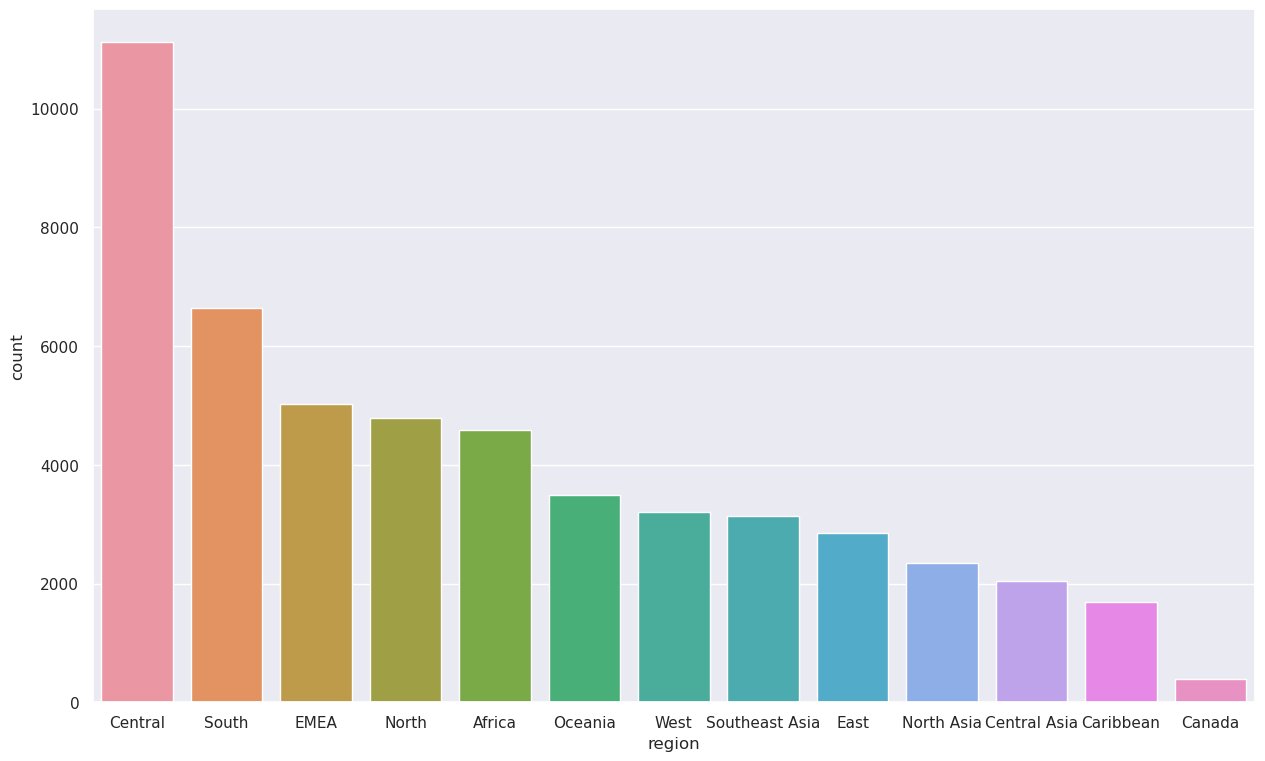

In [7]:
#sort by region and order count
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='region', data=df, order=df['region'].value_counts().index)

<AxesSubplot:title={'center':'Top 10 Customers in Central Region'}>

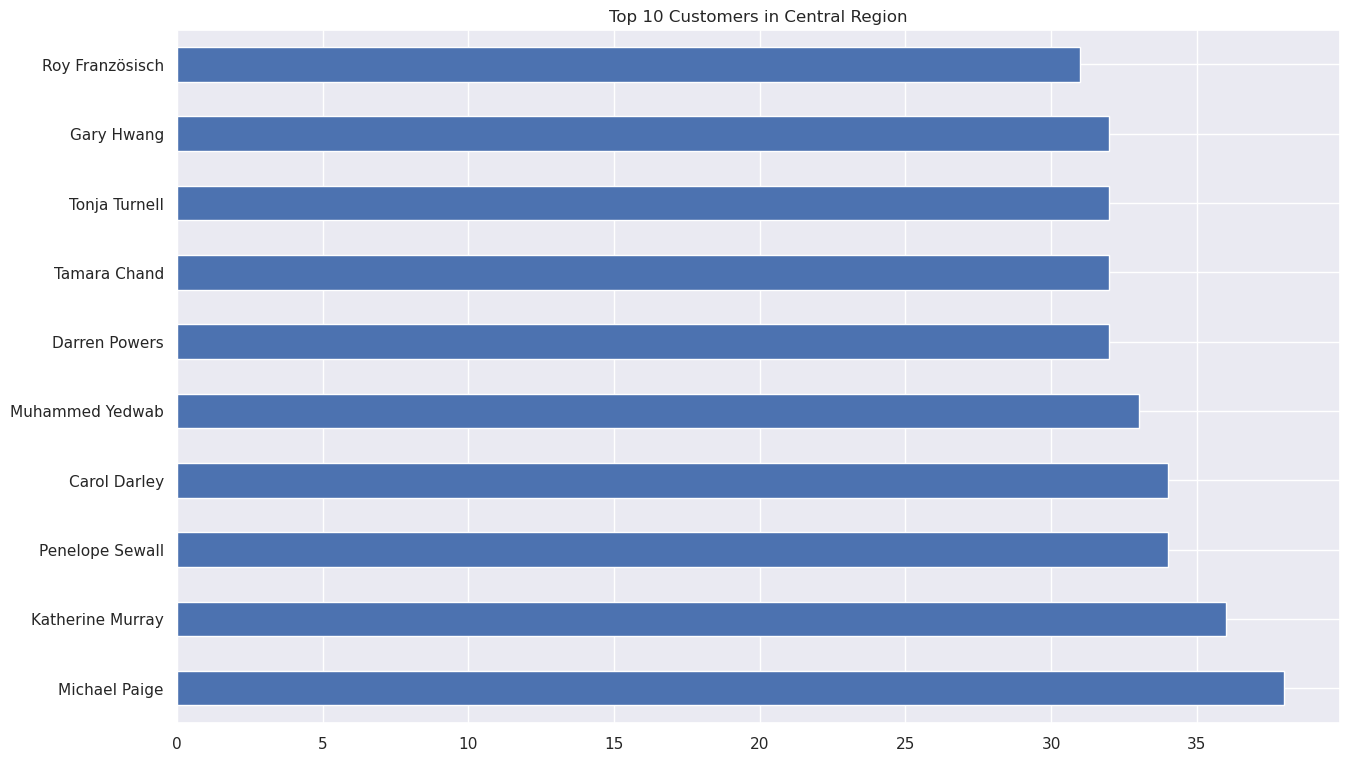

In [8]:
#Q3: Who are the Top 10 Customers of the SuperStore within Central and How much is their Repartition of the Profit?

df_central = df[df['region'] == 'Central']
df_central['customer_name'].value_counts()[:10].plot(kind='barh', title='Top 10 Customers in Central Region')

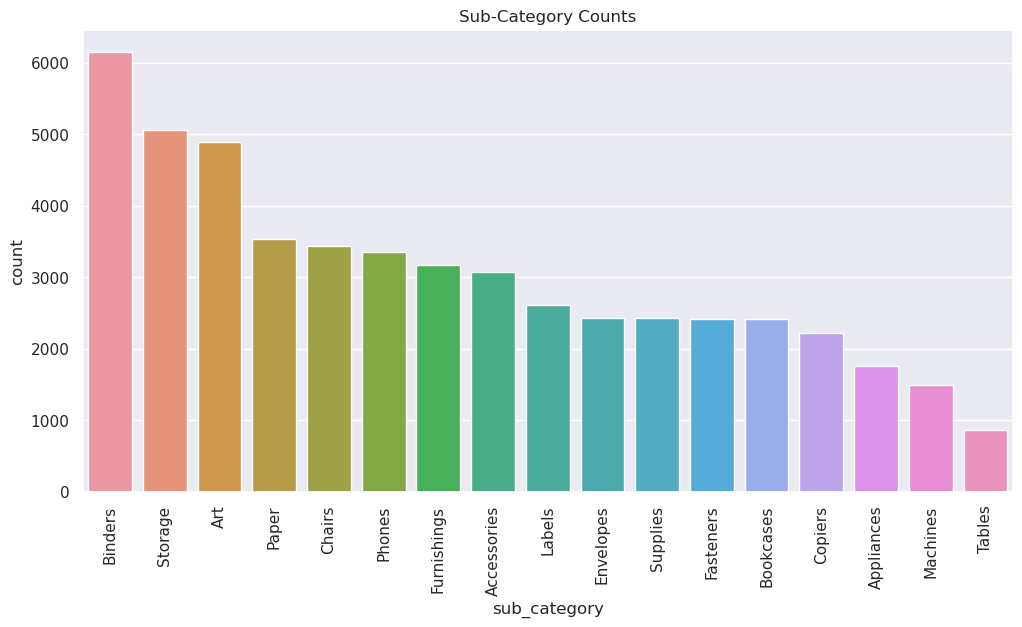

In [9]:
#What are the Highest selling and Lowest Selling Sub-Category?

subcat_counts = df['sub_category'].value_counts()
subcat_counts_sorted = subcat_counts.sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.countplot(x=df['sub_category'], order=subcat_counts_sorted.index)
plt.xticks(rotation=90)
plt.title('Sub-Category Counts')
plt.show()

In [10]:
#How much each Sub-Category is contributing in Sales of SuperStore?

subcat_profit = df.groupby('sub_category')['profit'].sum().sort_values(ascending=False)
print(subcat_profit.head(10))

sub_category
Copiers        258567.54818
Phones         216717.00580
Bookcases      161924.41950
Chairs         141973.79750
Appliances     141680.58940
Accessories    129626.30620
Storage        108461.48980
Binders         72449.84600
Paper           59207.68270
Machines        58867.87300
Name: profit, dtype: float64
